In [138]:
import torch
import numpy as np
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
import pde
from pde import GenerateData, NeuralNet, LinearQuadraticRegulator2D, NonLinear
from tqdm import tqdm

# Impose positive definite matrix P
- using Singular Value Decomposition
- using Cholesky

In [102]:
P = np.array([[np.sqrt(3), 1], [1, np.sqrt(3)]])
P

array([[1.73205081, 1.        ],
       [1.        , 1.73205081]])

In [104]:
# in this case we predict L
L = np.linalg.cholesky(P)
L @ L.T

array([[1.73205081, 1.        ],
       [1.        , 1.73205081]])

In [109]:
# in this case we generate a random orthogonal matrix Q and we predict the diagonal matrix
u, s, vh = np.linalg.svd(P)
u @ np.diag(s) @ vh

array([[1.73205081, 1.        ],
       [1.        , 1.73205081]])

In [111]:
Q = ortho_group.rvs(2)
Q

array([[ 0.62134049, -0.78354068],
       [ 0.78354068,  0.62134049]])

# Linear example

In [145]:
layers = [2, 20, 2]
network = NeuralNet(layers=layers, quadraticForm=False, useAdditionalModel=False, imposePsd=True, imposeCholesky=False, **{'countMatrices': 1})
gamma = {'matrix':0, 'residual':1, 'data':0, 'gradient':0}
lqr = LinearQuadraticRegulator2D(network=network, gamma=gamma, correctShift=False)

lrs = [1e-2, 1e-3]
iterations = [1000, 2000]

In [146]:
resu = lqr.train(
    interiorPointCount=100,
    dataPointCount=1,
    lrs=lrs,
    iterations=iterations,
    useTestData=False,
    verbose=True
    )

xInt:  torch.Size([100, 2])
xData:  torch.Size([1, 2])
0 / 3000 (0 / 1000), lr:1.0e-02, loss:1.19e-01 (data: 0.00e+00, grad: 0.00e+00, res: 1.19e-01, mat: 0.00e+00)
100 / 3000 (100 / 1000), lr:1.0e-02, loss:2.84e-06 (data: 0.00e+00, grad: 0.00e+00, res: 2.84e-06, mat: 0.00e+00)
200 / 3000 (200 / 1000), lr:1.0e-02, loss:1.38e-06 (data: 0.00e+00, grad: 0.00e+00, res: 1.38e-06, mat: 0.00e+00)
300 / 3000 (300 / 1000), lr:1.0e-02, loss:1.23e-06 (data: 0.00e+00, grad: 0.00e+00, res: 1.23e-06, mat: 0.00e+00)
400 / 3000 (400 / 1000), lr:1.0e-02, loss:1.07e-06 (data: 0.00e+00, grad: 0.00e+00, res: 1.07e-06, mat: 0.00e+00)
500 / 3000 (500 / 1000), lr:1.0e-02, loss:9.26e-07 (data: 0.00e+00, grad: 0.00e+00, res: 9.26e-07, mat: 0.00e+00)
600 / 3000 (600 / 1000), lr:1.0e-02, loss:7.92e-07 (data: 0.00e+00, grad: 0.00e+00, res: 7.92e-07, mat: 0.00e+00)
700 / 3000 (700 / 1000), lr:1.0e-02, loss:6.73e-07 (data: 0.00e+00, grad: 0.00e+00, res: 6.73e-07, mat: 0.00e+00)
800 / 3000 (800 / 1000), lr:1.0e-02, 

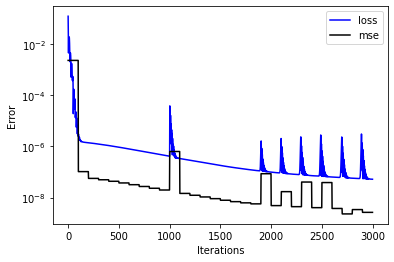

In [153]:
fig, ax = plt.subplots()
resu['loss'].plot(ax=ax, color='blue')
resu['mse'].plot(ax=ax, color='black')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Error');

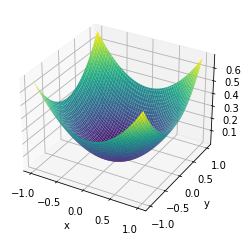

In [159]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = lqr.getEvaluationPoints()

Z = network.computeValueFunction(space).reshape(-1, 100)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');
ax.set_xlabel('x')
ax.set_ylabel('y');

## Non linear example

In [206]:
layers = [2, 20, 6]
network = NeuralNet(layers=layers, quadraticForm=False, useAdditionalModel=False, imposePsd=True, imposeCholesky=False, **{'countMatrices': 3})
gamma = {'matrix':0, 'residual':1, 'data':0, 'gradient':0}
pde = NonLinear(network=network, gamma=gamma, correctShift=False, eps=1)

lrs = [1e-2, 1e-3]
iterations = [1000, 4000]

In [207]:
resu = pde.train(
    interiorPointCount=100,
    dataPointCount=1,
    lrs=lrs,
    iterations=iterations,
    useTestData=False,
    verbose=True
    )

xInt:  torch.Size([100, 2])
xData:  torch.Size([1, 2])
0 / 5000 (0 / 1000), lr:1.0e-02, loss:6.41e-01 (data: 0.00e+00, grad: 0.00e+00, res: 6.41e-01, mat: 0.00e+00)
100 / 5000 (100 / 1000), lr:1.0e-02, loss:7.00e-02 (data: 0.00e+00, grad: 0.00e+00, res: 7.00e-02, mat: 0.00e+00)
200 / 5000 (200 / 1000), lr:1.0e-02, loss:6.84e-02 (data: 0.00e+00, grad: 0.00e+00, res: 6.84e-02, mat: 0.00e+00)
300 / 5000 (300 / 1000), lr:1.0e-02, loss:6.78e-02 (data: 0.00e+00, grad: 0.00e+00, res: 6.78e-02, mat: 0.00e+00)
400 / 5000 (400 / 1000), lr:1.0e-02, loss:6.75e-02 (data: 0.00e+00, grad: 0.00e+00, res: 6.75e-02, mat: 0.00e+00)
500 / 5000 (500 / 1000), lr:1.0e-02, loss:6.71e-02 (data: 0.00e+00, grad: 0.00e+00, res: 6.71e-02, mat: 0.00e+00)
600 / 5000 (600 / 1000), lr:1.0e-02, loss:6.65e-02 (data: 0.00e+00, grad: 0.00e+00, res: 6.65e-02, mat: 0.00e+00)
700 / 5000 (700 / 1000), lr:1.0e-02, loss:6.53e-02 (data: 0.00e+00, grad: 0.00e+00, res: 6.53e-02, mat: 0.00e+00)
800 / 5000 (800 / 1000), lr:1.0e-02, 

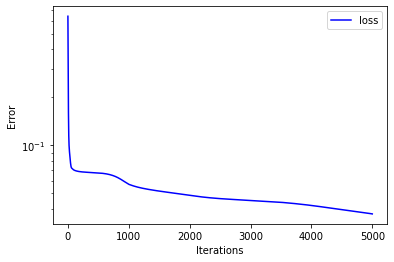

In [208]:
fig, ax = plt.subplots()
resu['loss'].plot(ax=ax, color='blue')
#resu['mse'].plot(ax=ax, color='black')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Error');

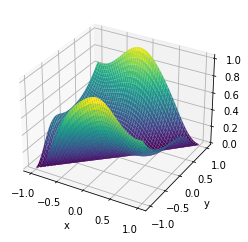

In [209]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = pde.getEvaluationPoints()

Z = network.computeValueFunction(space).reshape(-1, 100)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');
ax.set_xlabel('x')
ax.set_ylabel('y');

## Multiple runs

In [210]:
import ray

/usr/local/lib/python3.9/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


In [211]:
ray.shutdown()
ray.init()

2022-09-04 16:58:02,308	INFO services.py:1245 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '192.168.0.10',
 'raylet_ip_address': '192.168.0.10',
 'redis_address': '192.168.0.10:6379',
 'object_store_address': '/tmp/ray/session_2022-09-04_16-57-56_813040_17879/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2022-09-04_16-57-56_813040_17879/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2022-09-04_16-57-56_813040_17879',
 'metrics_export_port': 64270,
 'node_id': 'e239d022636ab9d300564c1fe26eb6f23e4668b23870584c738e0997'}

In [225]:
@ray.remote
def computeExperiments(lr):
    layers = [2, 20, 2]
    network = NeuralNet(layers=layers, quadraticForm=False, useAdditionalModel=False, imposePsd=True, imposeCholesky=False, **{'countMatrices': 1})
    gamma = {'matrix':0, 'residual':1, 'data':0, 'gradient':0}
    pde = NonLinear(network=network, gamma=gamma, correctShift=False, eps=1)

    lrs = [lr, 0.1*lr]
    iterations = [1000, 2000]

    resu = pde.train(
        interiorPointCount=100,
        dataPointCount=1,
        lrs=lrs,
        iterations=iterations,
        useTestData=False,
        verbose=False
        )

    info_dict = {}
    info_dict['lr'] = lr
    info_dict['loss'] = resu['loss'].iloc[-1]
    info_dict['mse'] = resu['mse'].iloc[-1]

    space = pde.getEvaluationPoints()
    Z = network.computeValueFunction(space).reshape(-1, 100)
    info_dict['Z'] =  Z
    info_dict['resu'] = resu
    return info_dict

In [226]:
inputs = [1e-1, 1e-2, 1e-3] * 20

In [227]:
refs = []
for lr in inputs:
    refs.append(computeExperiments.remote(lr))

returns = ray.get(refs)
returns = pd.DataFrame( returns )

(pid=80957) xInt:  torch.Size([100, 2])
(pid=80957) xData:  torch.Size([1, 2])
(pid=80965) xInt:  torch.Size([100, 2])
(pid=80965) xData:  torch.Size([1, 2])
(pid=80960) xInt:  torch.Size([100, 2])
(pid=80960) xData:  torch.Size([1, 2])
(pid=80956) xInt:  torch.Size([100, 2])
(pid=80956) xData:  torch.Size([1, 2])
(pid=80959) xInt:  torch.Size([100, 2])
(pid=80959) xData:  torch.Size([1, 2])
(pid=80964) xInt:  torch.Size([100, 2])
(pid=80964) xData:  torch.Size([1, 2])
(pid=80962) xInt:  torch.Size([100, 2])
(pid=80962) xData:  torch.Size([1, 2])
(pid=80958) xInt:  torch.Size([100, 2])
(pid=80958) xData:  torch.Size([1, 2])
(pid=80963) xInt:  torch.Size([100, 2])
(pid=80963) xData:  torch.Size([1, 2])
(pid=80961) xInt:  torch.Size([100, 2])
(pid=80961) xData:  torch.Size([1, 2])
(pid=80959) xInt:  torch.Size([100, 2])
(pid=80959) xData:  torch.Size([1, 2])
(pid=80964) xInt:  torch.Size([100, 2])
(pid=80964) xData:  torch.Size([1, 2])
(pid=80965) xInt:  torch.Size([100, 2])
(pid=80965) 

In [245]:
returns['loss'].sort_values().head()

9     0.000054
1     0.000103
6     0.000257
36    0.000331
3     0.000454
Name: loss, dtype: float64

lr: 1.0e-01


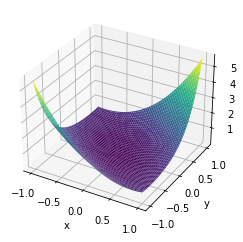

In [247]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = pde.getEvaluationPoints()

Z = returns[ returns['loss'] == returns['loss'].min() ]['Z'].item()
print('lr: %.1e' % returns[ returns['loss'] == returns['loss'].min() ]['lr'])

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');
ax.set_xlabel('x')
ax.set_ylabel('y');

## Two step learning

In [36]:
# network creation
layers = [2, 20, 3]
network = NeuralNet(layers=layers, quadraticForm=True, useAdditionalModel=False, imposePsd=False)

# pde creation
gamma = {'matrix':0, 'residual':0, 'data':1, 'gradient':0}
pde = NonLinear(network=network, gamma=gamma, correctShift=False, eps=0)

# training data
resu_data = pde.train(
    interiorPointCount=1,
    dataPointCount=20,
    lrs=[1e-2, 1e-3],
    iterations=[1000, 2000]
)

saved_weights = copy.deepcopy( pde.network.state_dict() )

xInt:  torch.Size([1, 2])
xData:  torch.Size([20, 2])


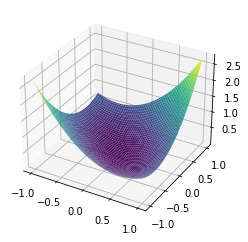

In [37]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = pde.getEvaluationPoints()

Z = pde.network.computeValueFunction(space).reshape(-1, 100)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');

In [38]:
# second training
gamma_residual = {'matrix':0, 'residual':1, 'data':0, 'gradient':0}
pde = NonLinear(network=network, gamma=gamma_residual, correctShift=False, eps=0)

pde.network.load_state_dict( saved_weights )

<All keys matched successfully>

In [39]:
resu_residual = pde.train(
    interiorPointCount=1000,
    dataPointCount=1,
    lrs=[1e-2, 1e-3],
    iterations=[2000, 5000]
)

xInt:  torch.Size([1000, 2])
xData:  torch.Size([1, 2])


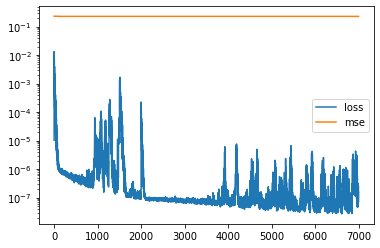

In [40]:
fig, ax = plt.subplots()
resu_residual['loss'].plot(ax=ax)
resu_residual['mse'].plot(ax=ax)
ax.set_yscale('log')
ax.legend();

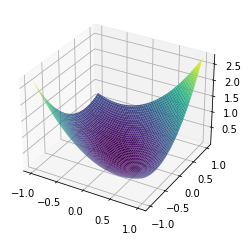

In [41]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = pde.getEvaluationPoints()

Z = pde.network.computeValueFunction(space).reshape(-1, 100)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');

## Debug

In [42]:
dim = space.shape[1]
stackedMatrices = torch.zeros((space.shape[0], dim, dim))
outputModel = network.model(space)

inds = np.triu_indices( dim )
k = 0
for i, j in zip( inds[0], inds[1] ):
    stackedMatrices[:, i, j] = outputModel[:, k]
    stackedMatrices[:, j, i] = outputModel[:, k]
    k += 1

In [45]:
stackedMatrices.var(axis=0)

tensor([[0.0003, 0.0028],
        [0.0028, 0.0111]], grad_fn=<VarBackward1>)

In [32]:
dim = space.shape[1]

# the below is SUPER fast
stackedMatrices = torch.zeros((space.shape[0], dim, dim))
outputModel = network.model(space)
#outputModel = torch.exp(outputModel)

for i in range( dim ):
    stackedMatrices[:, i, i] = outputModel[:, i]

stackedMatricesPsd = network.orthogonalMatrix @ stackedMatrices @ network.orthogonalMatrix.T